In [1]:
from __future__ import print_function
from sklearn.metrics.pairwise import euclidean_distances as eudist
from openpyxl import load_workbook
import numpy as np
import pandas as pd
import scipy.stats as sp
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib as mpl
import matplotlib.pyplot as pl
import math
%matplotlib inline

In [2]:
class GN_RBM:
    
    global pos_g1_hidden_probs_with_active_states, pos_g2_hidden_probs_with_active_states, min_val, max_val, errorg1, errorg2, epoc, p_g1_average,p_g2_average, threshold
    def __init__(self,num_visible,num_hidden):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.edge_tuple = ()
        
        #Initialing weights with uniform random value
        
        np.random.seed(1)# The seed is use to fixed the random values
        
        #Gene 1 weights initialization
        self.g1_weights = (np.random.uniform(low = -0.1*(1.0/np.sqrt(num_visible)),high = 0.1*(1.0/np.sqrt(num_visible)),
                                             size = (num_visible, num_hidden)))
        
        # Initializing the bais in the first row and column of the weight variable.
        self.g1_weights = np.insert(self.g1_weights, 0, 1, axis = 0)
        self.g1_weights = np.insert(self.g1_weights, 0, 1, axis = 1)
        
        #Gene 2 weights initialization
        self.g2_weights = (np.random.uniform(low = -0.1*(1.0/np.sqrt(num_visible)),high = 0.1*(1.0/np.sqrt(num_visible)),
                                             size = (num_visible, num_hidden)))
        
        # Initializing the bais in the first row and column of the weight variable.
        self.g2_weights = np.insert(self.g2_weights, 0, 1, axis = 0)
        self.g2_weights = np.insert(self.g2_weights, 0, 1, axis = 1)
        
    def train(self, g1_data, g2_data, max_epochs, row1, row2):
        learning_rate = 0.15
        
        # Train the RBM to update weights and bias and minimize the deference between positive and negative edge connection.
        
        num_g1_example = g1_data.shape[0]
        num_g2_example = g2_data.shape[0]
        # Insert bias with value of one
        g1_data_normalized = self._max_normal(g1_data)
        g2_data_normalized = self._max_normal(g2_data)
        
        g1_data_normalized = np.insert(g1_data_normalized, 0, 1, axis = 1)
        g2_data_normalized = np.insert(g2_data_normalized, 0, 1, axis = 1)
        
        errorg1 = []
        errorg2 = []
  
        g1_error_prev = 1
        g2_error_prev = 1
        first_node = 1
        edge_tuple = ()
        count =0 
        cnt =0
        for epoch in range(max_epochs):
            
            #Random selection of hidden states to be done with same random for both the genes.
            hidden_states_randm = np.random.randn(num_g1_example, self.num_hidden + 1)
            """ 
            (This phase activates the hidden nodes and calculate the connecting edge from input to hidden unit)
            # Note that we're using the activation *probabilities* of the hidden states, not the hidden states       
            # themselves, when computing associations. We could also use the states; see section 3 of Hinton's 
            # "A Practical Guide to Training Restricted Boltzmann Machines" for more.
            
            # Gene 1
            """
            pos_g1_hidden_activations = np.dot(g1_data_normalized, self.g1_weights)
            pos_g1_hidden_probs = self._sigmoid(pos_g1_hidden_activations)
            pos_g1_hidden_probs[:,0] = 1 # Fix the bias unit.
            pos_g1_hidden_states = pos_g1_hidden_probs > hidden_states_randm
            pos_g1_associations = np.dot(g1_data_normalized.T, pos_g1_hidden_probs)
            
            """ Using itself to reconstruct the input values """ 
            self_neg_g1_visible_activations = np.dot(pos_g1_hidden_probs, self.g1_weights.T)
            self_neg_g1_visible_probs = self._sigmoid(self_neg_g1_visible_activations)  
            self_neg_g1_visible_probs[:,0] = 1 # Fix the bias unit.
            self_neg_g1_hidden_activations = np.dot(self_neg_g1_visible_probs, self.g1_weights)
            self_neg_g1_hidden_probs = self._sigmoid(self_neg_g1_hidden_activations)
            self_neg_g1_hidden_probs[:,0] = 1 # Fix the bias unit.
            # Note, again, that we're using the activation *probabilities* when computing associations, not the states 
            # themselves.
            self_neg_g1_associations = np.dot(self_neg_g1_visible_probs.T, self_neg_g1_hidden_probs)
            
            """# Gene 2"""
            pos_g2_hidden_activations = np.dot(g2_data_normalized, self.g2_weights)
            pos_g2_hidden_probs = self._sigmoid(pos_g2_hidden_activations)
            pos_g2_hidden_probs[:,0] = 1 # Fix the bias unit.
            pos_g2_hidden_states = pos_g2_hidden_probs > hidden_states_randm
            pos_g2_associations = np.dot(g2_data_normalized.T, pos_g2_hidden_probs)
            
            """ Using itself to reconstruct the input values """ 
            self_neg_g2_visible_activations = np.dot(pos_g2_hidden_probs, self.g2_weights.T)
            self_neg_g2_visible_probs = self._sigmoid(self_neg_g2_visible_activations)  
            self_neg_g2_visible_probs[:,0] = 1 # Fix the bias unit.
            self_neg_g2_hidden_activations = np.dot(self_neg_g2_visible_probs, self.g2_weights)
            self_neg_g2_hidden_probs = self._sigmoid(self_neg_g2_hidden_activations)
            self_neg_g2_hidden_probs[:,0] = 1 # Fix the bias unit.
            # Note, again, that we're using the activation *probabilities* when computing associations, not the states 
            # themselves.
            self_neg_g2_associations = np.dot(self_neg_g2_visible_probs.T, self_neg_g2_hidden_probs)
            """
            # Reconstruct the visible units and sample again from the hidden units.
            
            """
            
            #For the first time only re-construction will be performed using their respective hidden states (features) from
            #the next time till the end of loop one genes hidden states will be exchanged with other genes for re-construction
            
            """# Gene 1"""
            #""" Using RBM2 values to reconstruct the inputted values """ 
            
            g2_neg_g1_visible_activations = np.dot(pos_g2_hidden_probs, self.g1_weights.T)
            g2_neg_g1_visible_probs = self._sigmoid(g2_neg_g1_visible_activations)  
            g2_neg_g1_visible_probs[:,0] = 1 # Fix the bias unit.
            g2_neg_g1_hidden_activations = np.dot(g2_neg_g1_visible_probs, self.g1_weights)
            g2_neg_g1_hidden_probs = self._sigmoid(g2_neg_g1_hidden_activations)
            g2_neg_g1_hidden_probs[:,0] = 1 # Fix the bias unit.
            # Note, again, that we're using the activation *probabilities* when computing associations, not the states 
            # themselves.
            g2_neg_g1_associations = np.dot(g2_neg_g1_visible_probs.T, g2_neg_g1_hidden_probs)
            
            
            """# Gene 2"""
            #""" Using RBM1 values to reconstruct the inputted values """ 
                
            g1_neg_g2_visible_activations = np.dot(pos_g1_hidden_probs, self.g2_weights.T)
            g1_neg_g2_visible_probs = self._sigmoid(g1_neg_g2_visible_activations)  
            g1_neg_g2_visible_probs[:,0] = 1 # Fix the bias unit.
            g1_neg_g2_hidden_activations = np.dot(g1_neg_g2_visible_probs, self.g2_weights)
            g1_neg_g2_hidden_probs = self._sigmoid(g1_neg_g2_hidden_activations)
            g1_neg_g2_hidden_probs[:,0] = 1 # Fix the bias unit.
            # Note, again, that we're using the activation *probabilities* when computing associations, not the states 
            # themselves.
            g1_neg_g2_associations = np.dot(g1_neg_g2_visible_probs.T, g1_neg_g2_hidden_probs)
            
            # Error calculation from orginal inputted values - reconstructed inputted values
            g1_error = np.sum((g1_data_normalized - self_neg_g1_visible_probs) ** 2)
            g2_error = np.sum((g2_data_normalized - self_neg_g2_visible_probs) ** 2)

            # Weights are updated when epoch=0 current error value is less than prev error value.
            
            if g1_error<=g1_error_prev and g2_error<=g2_error_prev and g1_error>0.001 and g1_error>0.001:
                
                self.g1_weights += learning_rate * ((pos_g1_associations - self_neg_g1_associations) / num_g1_example)
            
                self.g2_weights += learning_rate * ((pos_g2_associations - self_neg_g2_associations) / num_g2_example)
                
            elif g1_error<g1_error_prev and g2_error<g2_error_prev and g1_error<0.001 and g1_error<0.001:
                
                self.g1_weights += learning_rate * ((g2_neg_g1_associations - self_neg_g1_associations) / num_g1_example)
            
                self.g2_weights += learning_rate * ((g1_neg_g2_associations - self_neg_g2_associations) / num_g2_example)
            
            g1_error_prev = g1_error
            g2_error_prev = g2_error            

                
            active_hidden_states = pos_g1_hidden_states[pos_g1_hidden_states==pos_g2_hidden_states]
                
            pos_g1_hidden_probs_with_active_states = pos_g1_hidden_probs[(pos_g1_hidden_states==True)]# and (pos_g1_hidden_states==pos_g2_hidden_states)]
            pos_g2_hidden_probs_with_active_states = pos_g2_hidden_probs[(pos_g2_hidden_states==True)]# and (pos_g1_hidden_states==pos_g2_hidden_states)]
                
                #average of g1 and g2
            g1_average = np.mean(pos_g1_hidden_probs_with_active_states[1:])
            g2_average = np.mean(pos_g2_hidden_probs_with_active_states[1:])
                
            if(abs(g1_average-g2_average)>0.01):
                break
            errorg1 = np.append(errorg1,g1_average)
            errorg2 = np.append(errorg2,g2_average)
        
        '''Euclidean Distance'''
        eud_g1=self.euclidist(self_neg_g1_visible_probs[0,:], g2_neg_g1_visible_probs[0,:])
        eud_g2=self.euclidist(self_neg_g2_visible_probs[0,:], g1_neg_g2_visible_probs[0,:])
        
        GaussNB_RBM12 = self.GaussianNaiveBayes(self_neg_g1_visible_probs[0,:], self_neg_g2_visible_probs[0,:])
        GaussNB_RBM21 = self.GaussianNaiveBayes(self_neg_g2_visible_probs[0,:], self_neg_g1_visible_probs[0,:])
        
        max_weight = round(max(g1_average,g2_average),3)

        if abs(g1_average-g2_average)<0.016:
            if GaussNB_RBM12 > GaussNB_RBM21:
                self.edge_tuple = (row1, row2, max_weight)
            else:
                self.edge_tuple = (row2, row1, max_weight)    
        return self.edge_tuple
        
    def _sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    def _max_normal(self, x):
        maxmin = np.max(x) - np.min(x)
        x = x - np.min(x)

        return (x/maxmin)
    
    def euclidist(self, x, y):
        i=1
        eudi = 0;
        while(i<len(x)):
            eudi= eudi+(x[i]-y[i])*(x[i]-y[i])
            i=i+1
        eucldst = math.sqrt(eudi)
        
        return eudi
    
    def gene_network_graph(self, edges, s, e):
        
        G = nx.DiGraph(seed=1)
        nodes = list(range(s,e))
        G.add_nodes_from(nodes)
        G.add_weighted_edges_from(edges)
        edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
        #pos=nx.shell_layout(G)
        pos = nx.nx_pydot.graphviz_layout(G)
        node_sizes = 400
        M = G.number_of_edges()
        edge_colors = range(2, M + 2)
        edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
        nx.draw(G,pos, with_labels=True)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                                       label_pos=0.28, font_size=6.8, font_color='k', 
                                       font_family='sans-serif', font_weight='normal')
        #nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='yellow')
        edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->')#,

        pl.show()        
        
    def GaussianNaiveBayes(self, x, y):
        p=1
        i=1
        mn=np.mean(y[1:])
        var=np.std(y[1:])
        dinominator=1/(math.sqrt(2*3.1459*var))
        while i<len(x):
            numerator=(x[i]-mn**2)/(2*var**2)
            p=p*math.exp(-numerator*dinominator)
            i=i+1
        return p;
            

C:\Anaconda3\lib\site-packages\openpyxl\workbook\names\named_range.py:124: UserWarning: Discarded range with reserved name
  warnings.warn("Discarded range with reserved name")


240


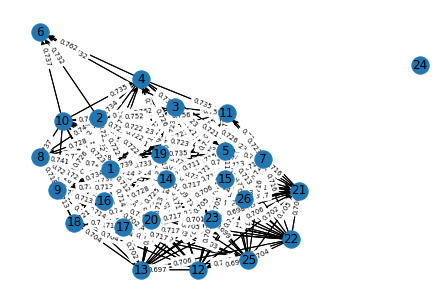

In [3]:
if __name__ == '__main__':
    r = GN_RBM(num_visible = 17, num_hidden = 17)
    
    wb = load_workbook('final_genes_new.xlsx')
    sheet_1 = wb.get_sheet_by_name('Sheet1')

    g1_data = np.zeros((1,17))
    g2_data = np.zeros((1,17))
    g1= pd.DataFrame(np.zeros((1,17)))
    g2= pd.DataFrame(np.zeros((1,17)))
    nodes = ()
    edges = []
    s=1
    e=27
    k = s
    j = s
    
    while j<e:
        while k<e:
            if j==k:
                k = k + 1
            g1_data=np.array([[sheet_1.cell(row=j,column=i).value for i in range(1,18)]])
            g2_data=np.array([[sheet_1.cell(row=k,column=i).value for i in range(1,18)]])
            r.__init__(17,17)
            if j != e and k != e:
                r.train(g1_data, g2_data, max_epochs = 1000, row1 = j, row2 = k)
            if r.edge_tuple != ():
                edges.append(r.edge_tuple)
            k=k+1
        k = j+1
        j=j+1

    print(len(edges))
    r.gene_network_graph(edges, s, e)
    